In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import pandas as pd
import xarray as xr
from cartopy.io.shapereader import Reader
from matplotlib.projections.polar import PolarAxes
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import linregress, weibull_min
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from windrose import WindroseAxes
# Custom libraries
import data_loading
import plotting
import netcdf_exploration
import data_analysis

In [9]:
# Base paths for different categories
measurements_path = 'data/measurements/'
turbine_info_path = 'data/turbine-info/coordinates/'
turbine_power_curves_path = 'data/turbine-info/power_curves/'
shapefiles_path = 'data/shapefiles/'
reanalysis_path = 'data/reanalysis/'

# Buyoy NetCDF files
bouy6_path = f'{measurements_path}2023-11-06_Buoy6_BSH_N-9.nc'
bouy2_path = f'{measurements_path}2023-11-09_Buoy2_BSH_N-9.nc'
# ERA5 D
era5_path = reanalysis_path
# Layouts base paths
turbines_existing_path = f'{turbine_info_path}existing/'
turbines_planned_future_path = f'{turbine_info_path}planned_future/'
turbines_planned_in_operation_before_2030_path = f'{turbine_info_path}planned_in_operation_before_2030/'
turbines_planned_netherlands_path = f'{turbine_info_path}planned_netherlands/'
turbines_area_of_interest_path = f'{turbine_info_path}area_of_interest/'
# Shapefiles paths
shapefiles_DEU_path = f'{shapefiles_path}DEU/DEU_adm1.shp'
shapefiles_DNK_path = f'{shapefiles_path}DNK/gadm36_DNK_1.shp'
shapefiles_NLD_path = f'{shapefiles_path}NLD/gadm36_NLD_1.shp'

# Wind field layout files
file_N9_1 = f'{turbines_area_of_interest_path}layout-N-9.1.geom.csv'
file_N9_2 = f'{turbines_area_of_interest_path}layout-N-9.2.geom.csv'
file_N9_3 = f'{turbines_area_of_interest_path}layout-N-9.3.geom.csv'

In [3]:
import os

file_path = bouy6_path
print("File exists:", os.path.exists(file_path))
print(os.getcwd())

File exists: True
c:\StudentProject-Yield-Predictions-Offshore


In [4]:
xrbuoy6 = xr.open_dataset(bouy6_path)
xrbuoy2 = xr.open_dataset(bouy2_path)

buoy2_file = nc.Dataset(bouy2_path)
buoy6_file = nc.Dataset(bouy6_path)

#### 1. Set the Turbine Design: 
- International Energy Agency (IEA) for a 15 MW offshore wind turbine
- Turbine name: IEA-15MW-D240-H150
-rotor diameter:  240 meters
- hub height: 150 meters

With that we say the height of interest is the one, nearest on the hub height: 140 m 


#### 2. Plot the field of interest together with the lidar measurement buoy positions


DriverError: data/shapefiles/DNK/DNK_adm1.shp: No such file or directory

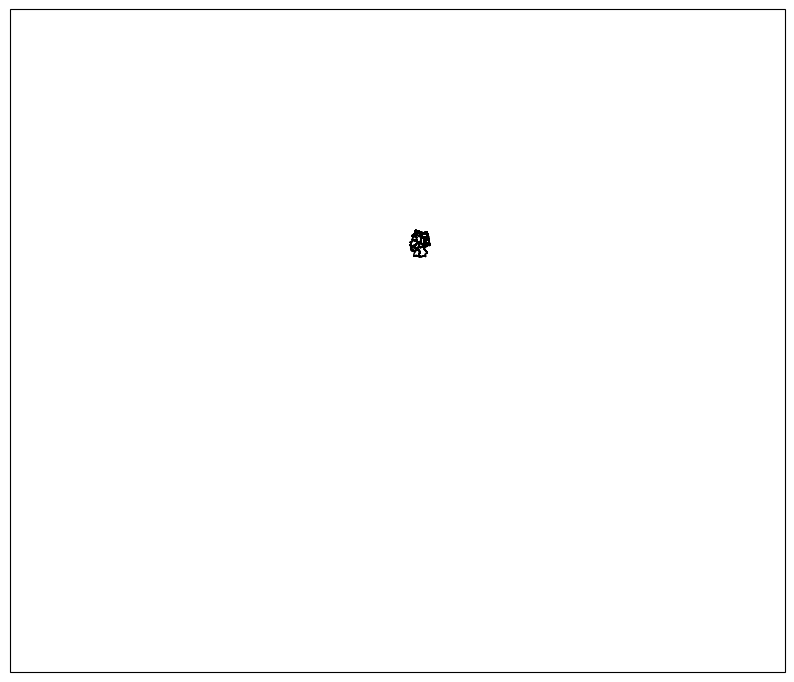

In [10]:
# Load the data
data_N9_1 = pd.read_csv(file_N9_1)
data_N9_2 = pd.read_csv(file_N9_2)
data_N9_3 = pd.read_csv(file_N9_3)

# Create a plot with cartopy
fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Add shapefiles
for shapefile_path in [shapefiles_DEU_path, shapefiles_DNK_path, shapefiles_NLD_path]:
    ax.add_geometries(Reader(shapefile_path).geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black')

# Plot each wind farm field
plotting.plot_wind_farm(data_N9_1, 'Wind Farm N9.1', ax, 'blue')
plotting.plot_wind_farm(data_N9_2, 'Wind Farm N9.2', ax, 'green')
plotting.plot_wind_farm(data_N9_3, 'Wind Farm N9.3', ax, 'purple')

# Set extent (bounding box) to focus on the wind farms
ax.set_extent([4.5, 7.5, 53, 54.8], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

plt.title('Wind Farms in the North Sea')
plt.show()